In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
df=pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.isnull==True

False

# As there are no NULL values we can visualize the insights from data 

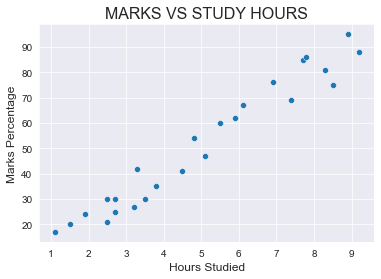

In [13]:
sns.set_style('darkgrid')
sns.scatterplot(y=df['Scores'],x=df['Hours'])
plt.title("MARKS VS STUDY HOURS",size=16)
plt.xlabel("Hours Studied",size=12)
plt.ylabel("Marks Percentage",size=12)
plt.show()


### From the graph,it shows there is correlation between two attributes,so make it clear by using regression line

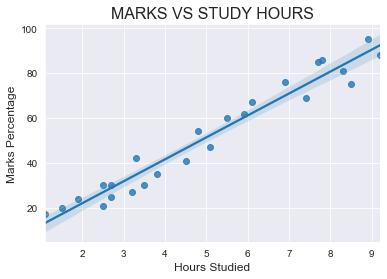

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [16]:
sns.regplot(y=df['Scores'],x=df['Hours'])
plt.title("MARKS VS STUDY HOURS",size=16)
plt.xlabel("Hours Studied",size=12)
plt.ylabel("Marks Percentage",size=12)
plt.show()
print(df.corr())

##### Postively correlated

# Modelling

### 1)train_test_split

In [30]:
X = df.iloc[:,:1].values 
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [28]:
y = df.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [31]:
train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=0)

In [32]:
#fitting the model
regression=LinearRegression()
regression.fit(train_X,train_y)
print("Model trained Successfully")

Model trained Successfully


In [35]:
pred_y=regression.predict(test_X)
prediction=pd.DataFrame({'Hours': [i[0] for i in test_X],'Predicted values': [k for k in pred_y]})
prediction

,Hours,Predicted values
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [42]:
comparing_scores=pd.DataFrame({'Actual_Marks' : test_y,'Predicted_Values': pred_y})
comparing_scores

,Actual_Marks,Predicted_Values
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


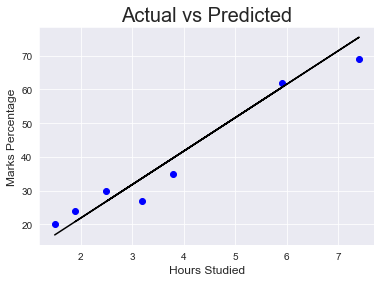

In [46]:
#predicted vs Actual plot
plt.scatter(x=test_X,y=test_y,color='blue')
plt.plot(test_X,pred_y,color='black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [48]:
print("MEAN ABSOLUTE ERROR",mean_absolute_error(test_y,pred_y))
print("Lower values are better")

MEAN ABSOLUTE ERROR 4.130879918502486
Lower values are better


## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [49]:
hours=[9.25]
answer=regression.predict([hours])

In [53]:
print("predicted score of a student if he/she studies for 9.25 hrs/ day is ",answer[0])

predicted score of a student if he/she studies for 9.25 hrs/ day is  93.89272889341655


### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.